In [2]:
import pandas as pd

# Load the newly uploaded CSV file to inspect its structure
file_path = "C:\\Users\\ACER\\Downloads\\bank+marketing\\bank\\bank.csv"

# Attempt to load the CSV file
df = pd.read_csv(file_path, header=None)

# Display the first few rows to understand the structure
df.head()


,0
0,"age;""job"";""marital"";""education"";""default"";""bal..."
1,"30;""unemployed"";""married"";""primary"";""no"";1787;..."
2,"33;""services"";""married"";""secondary"";""no"";4789;..."
3,"35;""management"";""single"";""tertiary"";""no"";1350;..."
4,"30;""management"";""married"";""tertiary"";""no"";1476..."


In [3]:
print(df.columns)

Index([0], dtype='int64')


In [14]:
df = pd.read_csv(file_path, header=None)

# Step 2: Split the cell values by the delimiter (assuming semicolon ';')
df_split = df[0].str.split(';', expand=True)

# Step 3: Remove the first row (since it's a repetition of column names)
df_split = df_split.iloc[1:]

# Step 4: Assign the appropriate column names
column_names = ["age", "job", "marital", "education", "default", "balance", "housing", 
                "loan", "contact", "day", "month", "duration", "campaign", "pdays", 
                "previous", "poutcome", "y"]
df_split.columns = column_names

# Step 5: Remove double quotes from all cells
df_split = df_split.replace('"', '', regex=True)

# Step 6: Save the cleaned DataFrame to a CSV file
output_file_path = 'processed_bank_data.csv'  # You can specify the path where you want to save the file
df_split.to_csv(output_file_path, index=False)

# If you are in a Jupyter notebook or Google Colab, you can use this code to download the file:
from IPython.display import FileLink

# Provide a link to download the file
FileLink(output_file_path)


d:\Prodigy_infotech\processed_bank_data.csv

**Import Required Libraries**

In [15]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

**Load the Dataset**



In [16]:
# Load the dataset
file_path = "D:\\Prodigy_infotech\\processed_bank_data.csv"  # Replace with the actual file path
df = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


**Data Preprocessing**

1. Encode Categorical Variables

In [17]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode categorical variables
for column in df.select_dtypes(include=['object']).columns:
    df[column] = label_encoder.fit_transform(df[column])

# Display the first few rows to verify encoding
df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,10,1,0,0,1787,0,0,0,19,10,79,1,-1,0,3,0
1,33,7,1,1,0,4789,1,1,0,11,8,220,1,339,4,0,0
2,35,4,2,2,0,1350,1,0,0,16,0,185,1,330,1,0,0
3,30,4,1,2,0,1476,1,1,2,3,6,199,4,-1,0,3,0
4,59,1,1,1,0,0,1,0,2,5,8,226,1,-1,0,3,0


2. Split the Dataset into Training and Testing Sets

In [18]:
# Define feature variables (X) and the target variable (y)
X = df.drop('y', axis=1)
y = df['y']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Check the shape of the training and testing sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((3164, 16), (1357, 16), (3164,), (1357,))

**Build and Train the Decision Tree Classifier**

In [19]:
# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the model
clf.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

**Make Predictions and Evaluate the Model**

In [23]:
# Make predictions on the testing set
y_pred = clf.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Generate a classification report
print(classification_report(y_test, y_pred))

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Optionally, save the results to a CSV file
results.to_csv('actual_vs_predicted.csv', index=False)

# Display actual vs predicted values
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results.head(10))  # Display the first 10 comparisons (you can adjust this as needed)


Accuracy: 0.86
              precision    recall  f1-score   support

           0       0.92      0.92      0.92      1205
           1       0.38      0.39      0.39       152

    accuracy                           0.86      1357
   macro avg       0.65      0.65      0.65      1357
weighted avg       0.86      0.86      0.86      1357

      Actual  Predicted
2398       0          0
800        0          1
2288       0          0
2344       0          0
3615       0          0
3548       0          0
1115       0          0
4053       0          0
838        0          0
4141       0          0


1. Visualize the Confusion Matrix

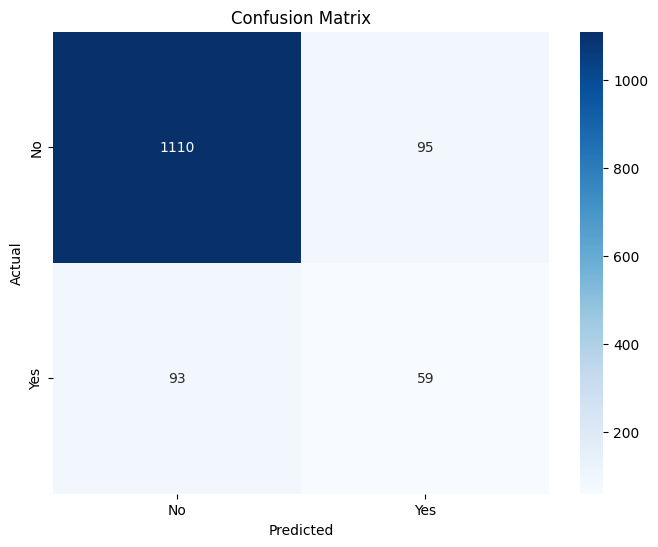

In [21]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
